# Serialization Performance Analysis
This notebook analyzes how different serialization methods perform across various question types.

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

# Set plot style
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
def load_and_prepare_data(results_dir):
    """Load and prepare the experiment data."""
    # Load the data
    df = pd.read_csv(results_dir / 'raw_experiment_results.csv')
    
    # Display basic info
    print("Data shape:", df.shape)
    print("\nFirst few rows:")
    display(df.head())
    
    # Show unique values
    print("\nUnique serialization methods:", df['serialization'].unique().tolist())
    print("Unique question types:", df['question_type'].unique().tolist())
    
    return df

In [4]:
def create_serialization_heatmap(df, score_threshold=0.5, save_path=None):
    """
    Create a heatmap showing performance of different serialization methods across question types.
    
    Parameters:
    - df: DataFrame containing the experiment results
    - score_threshold: Threshold to consider an answer as correct
    - save_path: Path to save the figure (optional)
    """
    # Calculate success rate for each serialization and question type
    df['is_correct'] = df['score'] >= score_threshold
    heatmap_data = df.pivot_table(
        index='serialization',
        columns='question_type',
        values='is_correct',
        aggfunc='mean'
    )
    
    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt='.2f',
        cmap='YlGnBu',
        linewidths=0.5,
        cbar_kws={'label': 'Success Rate'}
    )
    
    plt.title('Serialization Performance by Question Type')
    plt.xlabel('Question Type')
    plt.ylabel('Serialization Method')
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    plt.show()
    return heatmap_data

Loading and preparing data...
Data shape: (100, 9)

First few rows:


,question_id,question_type,serialization,num_attributes,question,ground_truth_answer,predicted_answer,llm_elapsed_time,score
0,0,object-count,natural,1,How many ashcans are there in the entire build...,There are 11 ashcans in the entire building.,To find the total number of ashcans in the ent...,4.579349,5.0
1,1,object-count,natural,1,How many spots are there to sit in room 0?,"If we consider armchairs, benches, sofas, and ...","In Room 0, the following items provide spots t...",1.964344,3.0
2,2,object-count,natural,1,Is there a monitor in room 8?,No there is not.,"No, there is no monitor in room 8. The items l...",1.456456,5.0
3,3,object-count,natural,1,Are there any fire extinguishers in the entire...,No there is not.,"Based on the provided room summaries, there ar...",1.252841,5.0
4,4,object-count,natural,1,How many rooms have paintings in them?,There are 6 rooms that have a painting inside ...,To determine how many rooms have paintings in ...,4.326400,2.0



Unique serialization methods: ['natural', 'json', 'indented', 'triplets']
Unique question types: ['object-count', 'spatial-reasoning', 'room-attributes']

Creating performance heatmap...


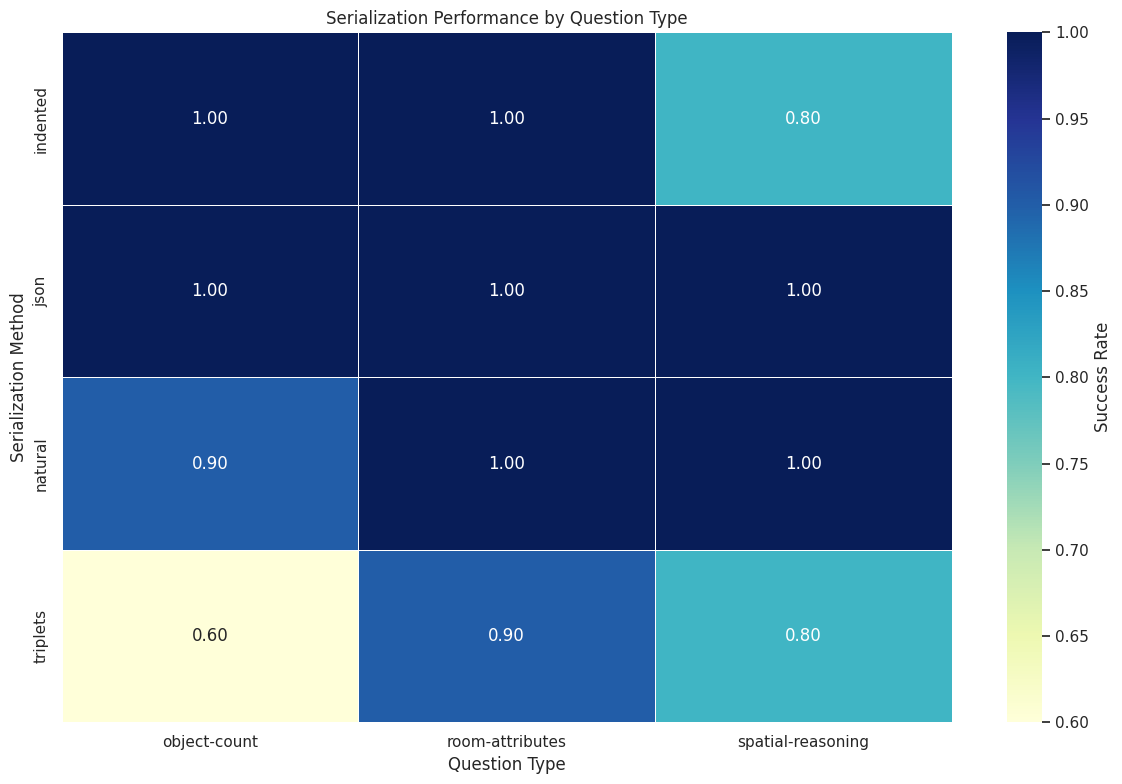


Performance Metrics (Success Rate):


question_type,object-count,room-attributes,spatial-reasoning
serialization,,,
indented,1.0,1.0,0.8
json,1.0,1.0,1.0
natural,0.9,1.0,1.0
triplets,0.6,0.9,0.8



Analysis complete! Heatmap saved to: /home/anaveen/Documents/mit_research_ws/01_dsg_prompting/dsg_llm_eval/results/logs/experiment_20250620_213816/analysis/serialization_performance_heatmap.png


In [5]:
# Main execution
if __name__ == "__main__":
    # Set paths
    results_dir = Path('/home/anaveen/Documents/mit_research_ws/01_dsg_prompting/dsg_llm_eval/results/logs/experiment_20250620_213816')
    output_dir = results_dir / 'analysis'
    os.makedirs(output_dir, exist_ok=True)
    
    # Load and prepare data
    print("Loading and preparing data...")
    df = load_and_prepare_data(results_dir)
    
    # Create and save heatmap
    print("\nCreating performance heatmap...")
    save_path = output_dir / 'serialization_performance_heatmap.png'
    heatmap_data = create_serialization_heatmap(df, save_path=save_path)
    
    # Display the heatmap data
    print("\nPerformance Metrics (Success Rate):")
    display(heatmap_data)
    
    print(f"\nAnalysis complete! Heatmap saved to: {save_path}")